Steps
<ul>
    <li>download data</li>
    <li>store in database</li>
    <li>create aggregated indicators</li>
    <li>visualize</li>

</ul>

<ul>
<ul>
<li>pull down all historic data<li>
<li>filter out unwanted countries</li>
<li>save to an sql database</li>
<li>update sql database</li>
<li>update charts with new data</li>
<li>create better interactive charts</li>
<li>publish charts to internet</li>

Indicators
<ul>
<li>deaths aggregated by month, by country -- line chart x=month, y=# deaths, colorline = country/location</li>

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import sqlite3
import sqlalchemy
%matplotlib inline

In [2]:
r = requests.get('http://acleddata.com/api/acled/read')

In [3]:
data = r.json()

In [4]:
data_set = data['data']

In [5]:
data_set[:10]

[{u'actor1': u'Protesters (Tunisia)',
  u'actor2': u'',
  u'admin1': u'Tataouine',
  u'admin2': u'Tataouine Nord',
  u'admin3': u'',
  u'ally_actor_1': u'',
  u'ally_actor_2': u'',
  u'country': u'Tunisia',
  u'data_id': u'181039',
  u'event_date': u'2016-09-10',
  u'event_id_cnty': u'11275RTA',
  u'event_id_no_cnty': u'',
  u'event_type': u'Riots/Protests',
  u'fatalities': u'0',
  u'geo_precision': u'1',
  u'gwno': u'616',
  u'inter1': u'6',
  u'inter2': u'0',
  u'interaction': u'60',
  u'latitude': u'33.0625',
  u'location': u'Oued El Ghar',
  u'longitude': u'10.6739',
  u'notes': u'Protests against pollution were reported in Tataouine province.',
  u'source': u'Shems FM',
  u'time_precision': u'1',
  u'year': u'2016'},
 {u'actor1': u'Protesters (Gabon)',
  u'actor2': u'',
  u'admin1': u'Estuaire',
  u'admin2': u'Komo-Mondah',
  u'admin3': u'',
  u'ally_actor_1': u'UFC: Union of Forces for Change',
  u'ally_actor_2': u'',
  u'country': u'Gabon',
  u'data_id': u'173405',
  u'event_da

In [9]:
data_set[:10][1]['actor1']

u'Protesters (Gabon)'

In [234]:
df = pd.DataFrame(data_set)

In [315]:
df.columns

Index([u'actor1', u'actor2', u'admin1', u'admin2', u'admin3', u'ally_actor_1',
       u'ally_actor_2', u'country', u'data_id', u'event_date',
       u'event_id_cnty', u'event_id_no_cnty', u'event_type', u'fatalities',
       u'geo_precision', u'gwno', u'inter1', u'inter2', u'interaction',
       u'latitude', u'location', u'longitude', u'notes', u'source',
       u'time_precision', u'year'],
      dtype='object')

In [69]:
features = ['country', 'fatalities', 'event_date']

In [70]:
fat_df = df[features]

In [71]:
fat_df.head()

,country,fatalities,event_date
0,Zambia,0,2016-07-02
1,Somalia,2,2016-07-02
2,Libya,0,2016-07-02
3,Libya,3,2016-07-02
4,Ethiopia,0,2016-07-02


In [100]:
fat_df['event_date'] = pd.to_datetime(fat_df['event_date'])

In [114]:
fat_df.head()

,country,fatalities,event_date
0,Zambia,0,2016-07-02
1,Somalia,2,2016-07-02
2,Libya,0,2016-07-02
3,Libya,3,2016-07-02
4,Ethiopia,0,2016-07-02


In [117]:
fat_df.index = fat_df['event_date']

del fat_df['event_date']

In [247]:
fat_df['fatalities'] = fat_df['fatalities'].apply(pd.to_numeric)

In [160]:
country_df = fat_df.groupby(fat_df['country']).resample('D').sum()

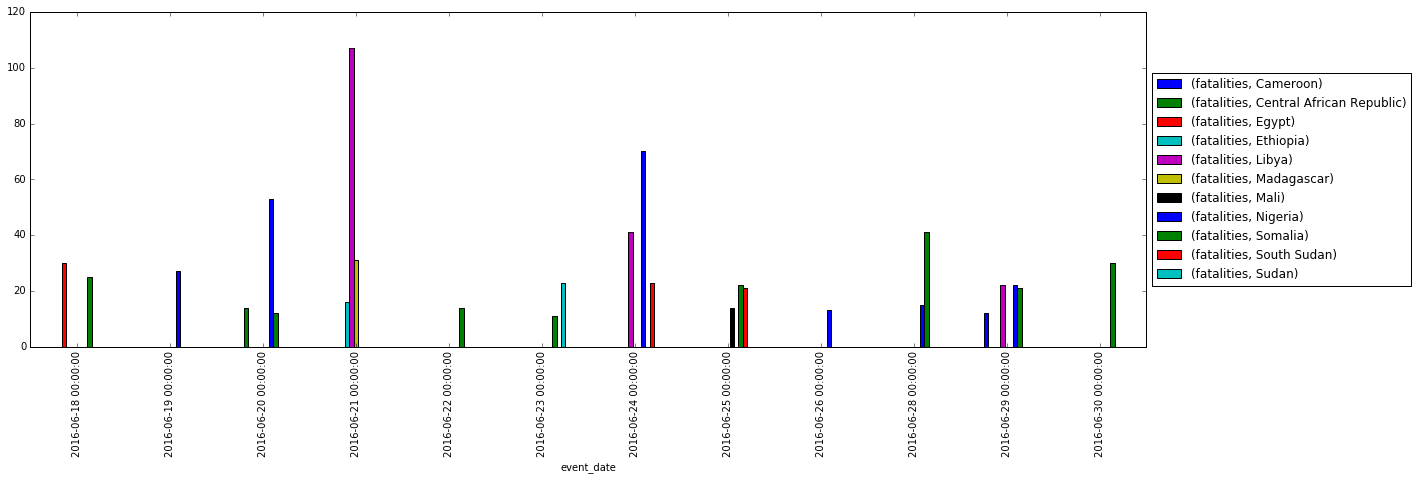

In [214]:
country_df[country_df['fatalities']>10].unstack(level=0).plot.bar(figsize=(20,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Deaths Caused by Political Violence Over Time

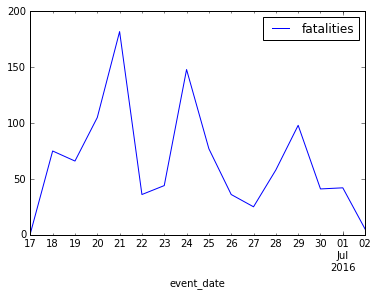

In [219]:
fat_df.resample('D').sum().plot()

In [239]:
df_inter_fat = df[['inter1', 'fatalities']]

In [250]:
df_inter_fat['fatalities'] = pd.to_numeric(df_inter_fat['fatalities'])

/Users/aschharwood/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Deaths Caused by Type of Participant

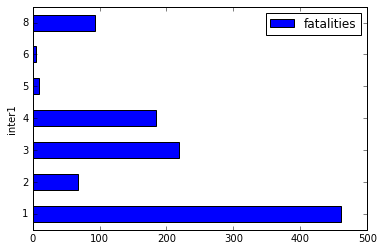

In [259]:
df_inter_fat['fatalities'].groupby(df_inter_fat['inter1']).sum().plot.barh()
plt.legend()

In [276]:
event_type_df = df['event_type'].groupby(df['event_type']).count()

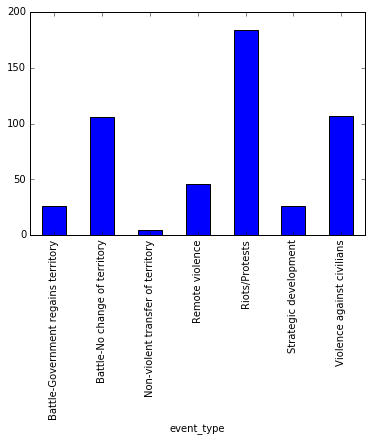

In [278]:
event_type_df.plot.bar()

In [301]:
types = df.apply(lambda x: pd.lib.infer_dtype(x.values))

In [316]:
df.info

<bound method DataFrame.info of                                                 actor1  \
0                                  Protesters (Zambia)   
1                                           Al Shabaab   
2    Military Forces of Libya (2016-) Presidential ...   
3    Military Forces of Libya (2016-) Presidential ...   
4                                Protesters (Ethiopia)   
5                     Military Forces of Egypt (2014-)   
6               Rioters (Democratic Republic of Congo)   
7               Rioters (Democratic Republic of Congo)   
8                                   Rioters (Zimbabwe)   
9                                   Rioters (Zimbabwe)   
10                     Police Forces of Zambia (2015-)   
11                     Police Forces of Uganda (1986-)   
12                                    Rioters (Uganda)   
13                                Protesters (Tunisia)   
14                           Protesters (South Africa)   
15                           Protesters 